<h1><center><font size="6">Data exploration: Creditas challenge</font></center></h1>

No presente notebook é apresentado o EDA, o resultado da exploração do conjunto de dados assim como a visualização de alguns experimentos para tomar uma desição ao momento de fazer a preparação dos dados. Olhando a descripção dos dados e os objetivos, algúns pontos a se destacar são:

*  A variável *pre_approved* indica se uma pessoa foi pre aprovada para o empréstimo.
* Devemos de filtrar as pessoas que foram pre aprovadas.
* A variável do nosso interesse é *sent_to_analysis*.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import unidecode
from wordcloud import WordCloud, STOPWORDS

In [2]:
data = pd.read_csv("dataset.csv",na_values=[" "])
print("The dimension from the dataset is: {}".format(data.shape))

The dimension from the dataset is: (35021, 32)


 Filtrando os clientes que foram pre aprovados para o empréstimo com garantia de automóvel.

In [3]:
data = data.loc[data["pre_approved"]==1,:].drop("pre_approved",axis=1)
data = data.reset_index().drop("index",axis=1)
print("The dimension from the filtred dataset is: {}".format(data.shape))

The dimension from the filtred dataset is: (14999, 31)


In [4]:
data.head()

id   age  monthly_income  collateral_value  loan_amount  \
0  173460  52.0          5668.0           24000.0       5000.0   
1  173455  20.0          5000.0           14200.0       5000.0   
2  173450  48.0          3000.0           17000.0       8000.0   
3  173442  56.0          7500.0           21000.0      12000.0   
4  173437  35.0          3379.0           16500.0       5000.0   

              city state  collateral_debt  verified_restriction  \
0        São Paulo    SP            900.0                   0.0   
1        Guarulhos    SP           1500.0                   0.0   
2           Manaus    AM           1060.0                   0.0   
3          Maracás    BA              0.0                   1.0   
4  Itaquaquecetuba    SP              0.0                   0.0   

   dishonored_checks  ...  auto_year  form_completed  sent_to_analysis  \
0                  0  ...     2011.0             0.0               0.0   
1                  0  ...     2004.0             0.0               0.0   
2                  0  ...     2010.0             0.0               0.0   
3                  0  ...     2012.0             0.0               0.0   
4                  0  ...     2008.0             0.0               0.0   

      channel  zip_code                             landing_page  \
0      search  4028XXXX                   /emprestimos/solicitar   
1      direct  7060XXXX                             /emprestimos   
2  affiliates  6906XXXX  /emprestimos/garantia-veiculo/solicitar   
3      social  4536XXXX                   /emprestimos/solicitar   
4      search  8588XXXX                   /emprestimos/solicitar   

   landing_page_product  gender utm_term  \
0          PersonalLoan  female      NaN   
1                   NaN    male      NaN   
2                   NaN    male      NaN   
3          PersonalLoan    male      NaN   
4          PersonalLoan    male      NaN   

                                     education_level  
0  Ensino médio completo (antigo 2º grau, secundá...  
1  Ensino médio completo (antigo 2º grau, secundá...  
2                         Educação superior completa  
3                                                NaN  
4  Ensino médio completo (antigo 2º grau, secundá...  

[5 rows x 31 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    14999 non-null  int64  
 1   age                   14999 non-null  float64
 2   monthly_income        14999 non-null  float64
 3   collateral_value      14986 non-null  float64
 4   loan_amount           14999 non-null  float64
 5   city                  14991 non-null  object 
 6   state                 14999 non-null  object 
 7   collateral_debt       9692 non-null   float64
 8   verified_restriction  14935 non-null  float64
 9   dishonored_checks     14999 non-null  int64  
 10  expired_debts         14999 non-null  int64  
 11  banking_debts         14999 non-null  int64  
 12  commercial_debts      14999 non-null  int64  
 13  protests              14999 non-null  int64  
 14  marital_status        402 non-null    object 
 15  informed_restrictio

In [6]:
data.describe()

id           age  monthly_income  collateral_value  \
count   14999.000000  14999.000000    1.499900e+04      1.498600e+04   
mean   142736.806120     38.364091    1.100453e+04      4.910900e+04   
std     19975.509247     11.600660    1.538795e+05      9.875603e+05   
min     98327.000000     18.000000    0.000000e+00      0.000000e+00   
25%    128630.000000     30.000000    2.500000e+03      1.700000e+04   
50%    145687.000000     36.000000    4.000000e+03      2.300000e+04   
75%    159355.500000     46.000000    6.000000e+03      3.348600e+04   
max    173460.000000    115.000000    1.100000e+07      1.000000e+08   

         loan_amount  collateral_debt  verified_restriction  \
count   14999.000000     9.692000e+03          14935.000000   
mean    14669.106070     4.375592e+03              0.141547   
std     13961.086341     1.033531e+05              0.348596   
min      2500.000000     0.000000e+00              0.000000   
25%      6000.000000     0.000000e+00              0.000000   
50%     10500.000000     0.000000e+00              0.000000   
75%     18900.000000     2.000000e+03              0.000000   
max    719000.000000     1.010000e+07              1.000000   

       dishonored_checks  expired_debts  banking_debts  commercial_debts  \
count       14999.000000   14999.000000   14999.000000      14999.000000   
mean            0.019001       0.002667       0.061204          0.088606   
std             0.136534       0.051574       0.239712          0.284184   
min             0.000000       0.000000       0.000000          0.000000   
25%             0.000000       0.000000       0.000000          0.000000   
50%             0.000000       0.000000       0.000000          0.000000   
75%             0.000000       0.000000       0.000000          0.000000   
max             1.000000       1.000000       1.000000          1.000000   

           protests  informed_restriction  loan_term  monthly_payment  \
count  14999.000000          14193.000000        0.0     1.424900e+04   
mean       0.015134              0.179596        NaN     8.509226e+02   
std        0.122091              0.383864        NaN     1.821517e+04   
min        0.000000              0.000000        NaN     0.000000e+00   
25%        0.000000              0.000000        NaN     3.399400e+02   
50%        0.000000              0.000000        NaN     5.507000e+02   
75%        0.000000              0.000000        NaN     8.386900e+02   
max        1.000000              1.000000        NaN     2.163889e+06   

          auto_year  form_completed  sent_to_analysis  
count  14999.000000    14999.000000      14999.000000  
mean    2010.033002        0.277819          0.217948  
std        3.295334        0.447938          0.412866  
min     1986.000000        0.000000          0.000000  
25%     2008.000000        0.000000          0.000000  
50%     2010.000000        0.000000          0.000000  
75%     2013.000000        1.000000          0.000000  
max     2017.000000        1.000000          1.000000

In [7]:
data.isna().mean()

id                      0.000000
age                     0.000000
monthly_income          0.000000
collateral_value        0.000867
loan_amount             0.000000
city                    0.000533
state                   0.000000
collateral_debt         0.353824
verified_restriction    0.004267
dishonored_checks       0.000000
expired_debts           0.000000
banking_debts           0.000000
commercial_debts        0.000000
protests                0.000000
marital_status          0.973198
informed_restriction    0.053737
loan_term               1.000000
monthly_payment         0.050003
informed_purpose        0.087806
auto_brand              0.000000
auto_model              0.000067
auto_year               0.000000
form_completed          0.000000
sent_to_analysis        0.000000
channel                 0.037669
zip_code                0.000000
landing_page            0.037669
landing_page_product    0.380359
gender                  0.126142
utm_term                0.681712
education_

## Variáveis perdidas > 50%
Variáveis que estejam perdidas com um % maior a 50 devemos de ter precaução já que representam uma perdida de representativa para nosso análise e para o nosso modelo. 

In [8]:
features_missing_50_percent = data.isna().mean()>0.5
features_missing_50_percent = data.loc[:,features_missing_50_percent].columns.to_numpy()
print(features_missing_50_percent)

['marital_status' 'loan_term' 'utm_term']


Alguns pontos:
* Podemos observar variáveis do tipo continuas assim como categóricas.
* Algumas das variáveis estão perdidas. 
* Para as variáveis: *marital_status*, *loan_term*, *utm_term*, devemos de ter precaução. 
* A variável *loan_term* está perdida ao 100%, será omitida.

<h1><center><font size="6">Analisando sent_to_analysis: variável alvo</font></center></h1>


In [9]:
data['sent_to_analysis'].value_counts()

0.0    11730
1.0     3269
Name: sent_to_analysis, dtype: int64

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


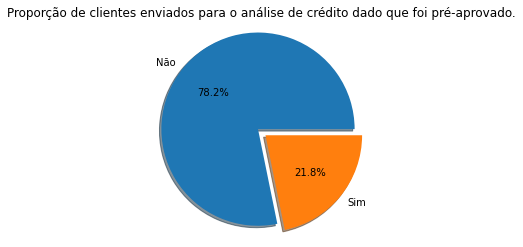

In [10]:
labels = ['Não','Sim']
sizes = [data['sent_to_analysis'].value_counts()]
colors = ['orange','blue']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True,explode=[0,0.1])
ax1.axis('equal')
ax1.set_title('Proporção de clientes enviados para o análise de crédito dado que foi pré-aprovado.')
plt.show()

Das pessoas que foram pré-aprovadas, um 21% foram enviadas para o análise de crédito.

<h1><center><font size="6">Analisando as variáveis continuas</font></center></h1>

Vamos a filtrar as variáveis que são do tipo float e int, além disso pode acontecer que algumas variáveis sejam do tipo categórico, assim também filtraremos as que tem mais de 2 levels para logo pedir um head() e avaliar.

In [11]:
features_continuous = ((data.dtypes=="float64") | (data.dtypes=="int64")) & (data.nunique()>2)
features_continuous = data.loc[:,features_continuous].drop("id",axis=1).columns.to_numpy()

In [12]:
data.loc[:,features_continuous].nunique()

age                   72
monthly_income      1476
collateral_value    1686
loan_amount         1014
collateral_debt      725
monthly_payment     2327
auto_year             30
dtype: int64

In [13]:
data[features_continuous].isna().mean()

age                 0.000000
monthly_income      0.000000
collateral_value    0.000867
loan_amount         0.000000
collateral_debt     0.353824
monthly_payment     0.050003
auto_year           0.000000
dtype: float64

In [14]:
data[features_continuous].describe()

age  monthly_income  collateral_value    loan_amount  \
count  14999.000000    1.499900e+04      1.498600e+04   14999.000000   
mean      38.364091    1.100453e+04      4.910900e+04   14669.106070   
std       11.600660    1.538795e+05      9.875603e+05   13961.086341   
min       18.000000    0.000000e+00      0.000000e+00    2500.000000   
25%       30.000000    2.500000e+03      1.700000e+04    6000.000000   
50%       36.000000    4.000000e+03      2.300000e+04   10500.000000   
75%       46.000000    6.000000e+03      3.348600e+04   18900.000000   
max      115.000000    1.100000e+07      1.000000e+08  719000.000000   

       collateral_debt  monthly_payment     auto_year  
count     9.692000e+03     1.424900e+04  14999.000000  
mean      4.375592e+03     8.509226e+02   2010.033002  
std       1.033531e+05     1.821517e+04      3.295334  
min       0.000000e+00     0.000000e+00   1986.000000  
25%       0.000000e+00     3.399400e+02   2008.000000  
50%       0.000000e+00     5.507000e+02   2010.000000  
75%       2.000000e+03     8.386900e+02   2013.000000  
max       1.010000e+07     2.163889e+06   2017.000000

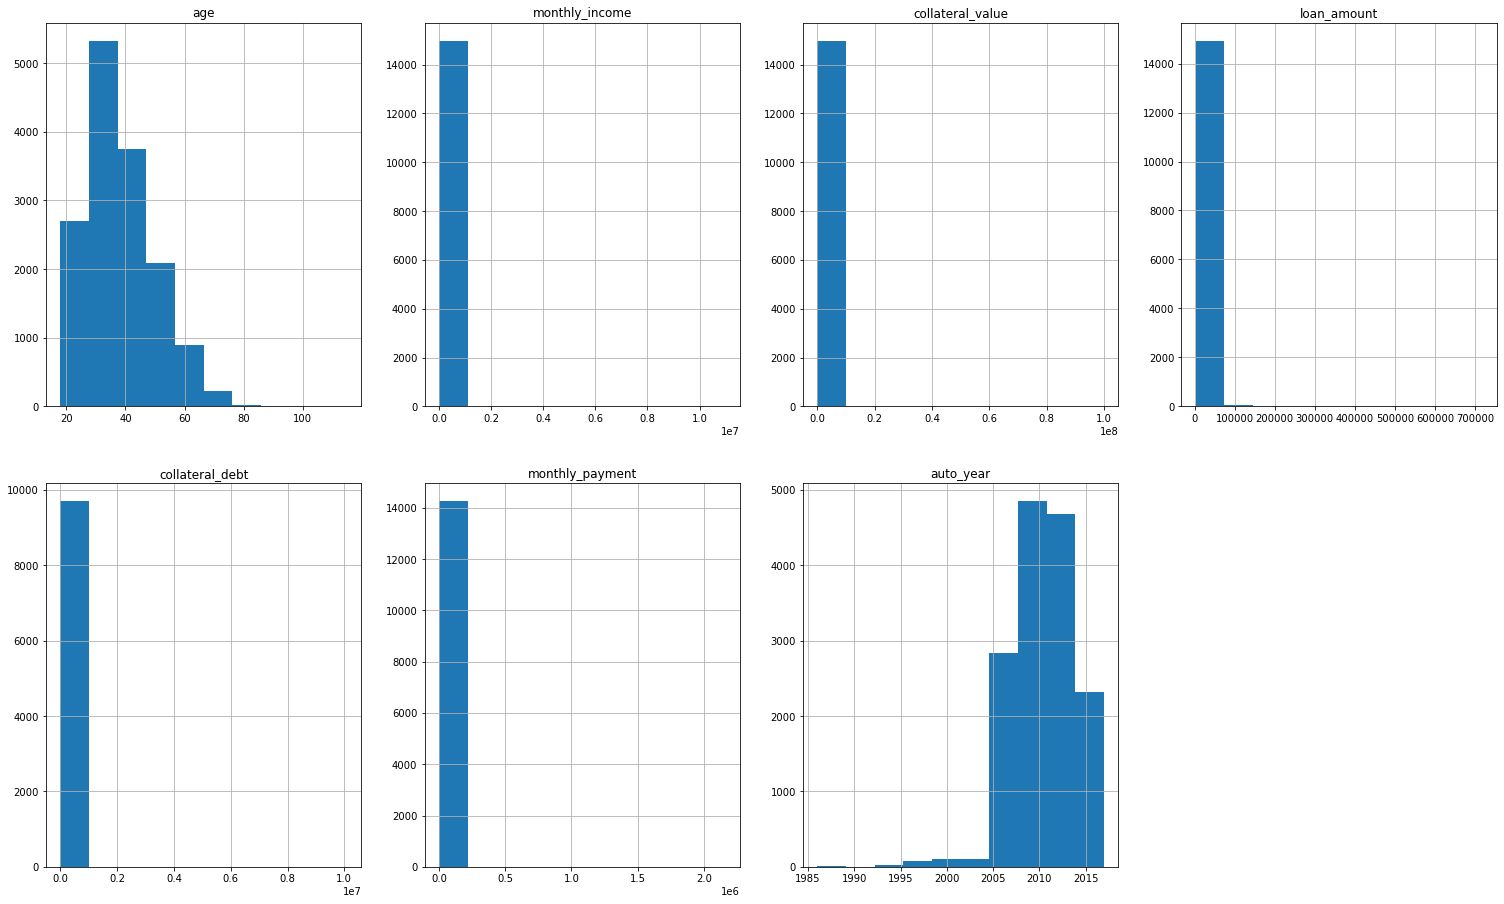

In [15]:
plt.figure(figsize=(26, 24))
for i,features_continuous_i in enumerate(features_continuous):
    plt.subplot(3, 4, i + 1)
    plt.title(features_continuous_i)
    data[features_continuous_i].hist()

**Alguns pontos importantes:**

* Tem-se uma concentração de clientes com uma idade entre 30 a 46 anos.
* Tem-se pontos atípicos na idade, pode-se observar que uma pessoa tem 115 anos.
* As variáveis *monthly_income*, *collateral_value*, *loan_amount*, *collateral_debt* e *monthly_payment* tem um comportamento muito assimétrico, sendo que tem uma maior concentração de valores perto de zero.
* Para a variável *auto_year* tem uma maior de carros entre 2008 e 2013.
* A variável *collateral_debt*  está perdida um 35%.

Para as variaveis *monthly_income*, *collateral_value*, *loan_amount*, *collateral_debt* e *monthly_payment* podemos utilizar a transformação do tipo logaritmo para obter valores simétricos e que os valores atípicos sejam menos possivelmente influentes.

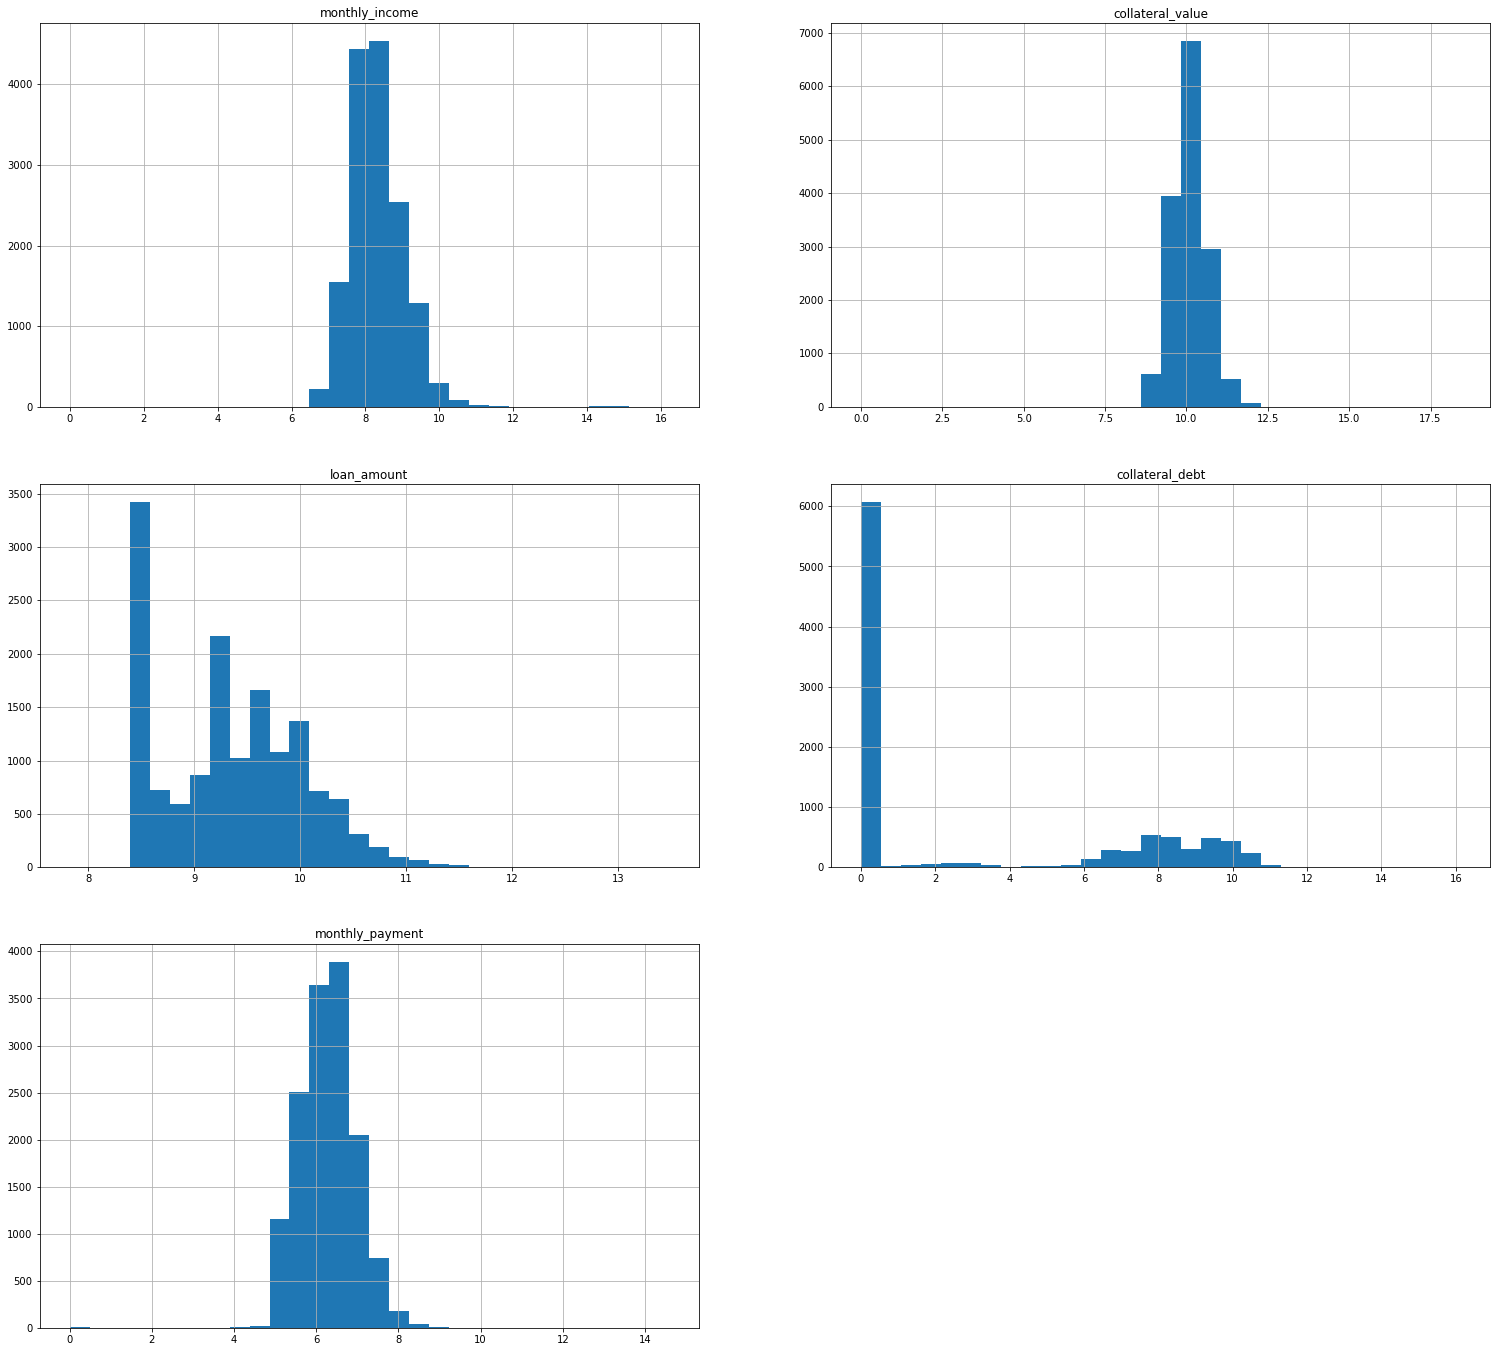

In [16]:
feature_to_transform_log = ["monthly_income", "collateral_value", "loan_amount", "collateral_debt", "monthly_payment"]
plt.figure(figsize=(26, 24))
for i,feature_to_transform_log_i in enumerate(feature_to_transform_log):
    plt.subplot(3, 2, i + 1)
    plt.title(feature_to_transform_log_i)
    np.log(data[feature_to_transform_log_i]+1).hist(bins=30)

* A variável collateral_debt tem a presença de muito zeros.

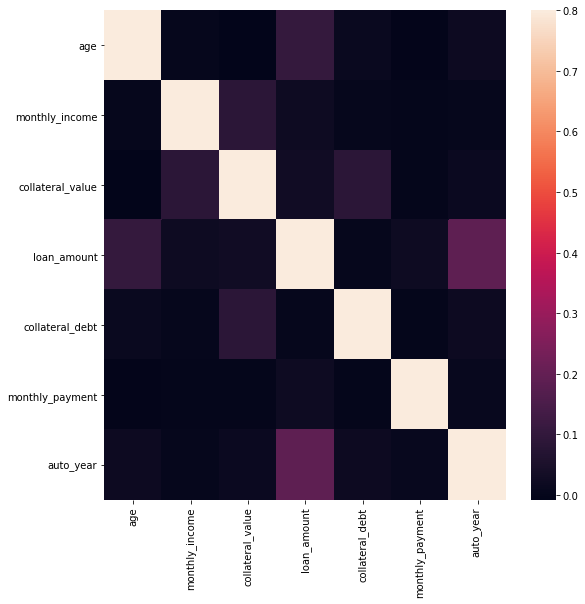

In [17]:
f, ax = plt.subplots(figsize=(9, 9))
sb.heatmap(data[features_continuous].corr(), 
            vmax=.8, square=False)

**Podemos ver que não existe correlações significativas entre as variáveis do tipo contínuas.**
Vale a pena dizer que a correlação de Pearson mede o grau da correlação linear entre duas variáveis.

## Analisando se a variável collateral_debt quando está perdida

Para analisar se uma observação perdida de *collateral_debt* tem um efeito na variável resposta, analisaremos um gráfico e ver se existe uma proporção maior que ao azar.

In [18]:
pd.crosstab(data["collateral_debt"].isna(),data["sent_to_analysis"]).apply(lambda r: r/r.sum(), axis=1)

sent_to_analysis       0.0       1.0
collateral_debt                     
False             0.807161  0.192839
True              0.736197  0.263803

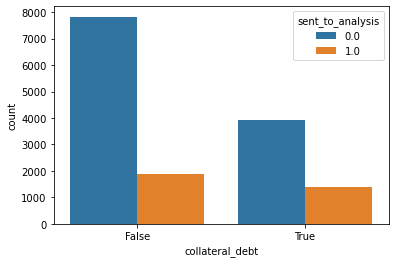

In [19]:
sb.countplot(data["collateral_debt"].isna(),hue=data["sent_to_analysis"])


Podemos apreciar que quando a variável está perdida, a proporção de pessoas enviada para o análise é de um 26%, um 5% a mais quando não se toma em consideração a variável.

<h1><center><font size="6">Analisando as variáveis categóricas</font></center></h1>

Vamos a filtrar as variáveis que são do tipo float e int, além disso pode acontecer que algumas variáveis sejam do tipo categórico, assim também filtraremos as que tem mais de 2 levels para logo pedir um head() e avaliar.

In [20]:
features_categorical = data.columns.difference(features_continuous)
features_categorical = data.loc[:,features_categorical].drop(["id","loan_term"],axis=1).columns.to_numpy()
print(len(features_categorical))

22


In [21]:
data[features_categorical].head()

auto_brand                                auto_model  banking_debts  \
0           Nissan               LIVINA 1.6 16V Flex Fuel 5p              0   
1  VW - VolksWagen    Fox City 1.0Mi/ 1.0Mi Total Flex 8V 3p              0   
2             Fiat         Palio 1.0 ECONOMY Fire Flex 8V 4p              0   
3   GM - Chevrolet  Classic/ Classic LS 1.0 VHC FlexPower 4p              0   
4   GM - Chevrolet   Celta Life/ LS 1.0 MPFI 8V FlexPower 5p              0   

      channel             city  commercial_debts  dishonored_checks  \
0      search        São Paulo                 0                  0   
1      direct        Guarulhos                 0                  0   
2  affiliates           Manaus                 0                  0   
3      social          Maracás                 0                  0   
4      search  Itaquaquecetuba                 0                  0   

                                     education_level  expired_debts  \
0  Ensino médio completo (antigo 2º grau, secundá...              0   
1  Ensino médio completo (antigo 2º grau, secundá...              0   
2                         Educação superior completa              0   
3                                                NaN              0   
4  Ensino médio completo (antigo 2º grau, secundá...              0   

   form_completed  ... informed_restriction  \
0             0.0  ...                  0.0   
1             0.0  ...                  0.0   
2             0.0  ...                  0.0   
3             0.0  ...                  0.0   
4             0.0  ...                  0.0   

                              landing_page  landing_page_product  \
0                   /emprestimos/solicitar          PersonalLoan   
1                             /emprestimos                   NaN   
2  /emprestimos/garantia-veiculo/solicitar                   NaN   
3                   /emprestimos/solicitar          PersonalLoan   
4                   /emprestimos/solicitar          PersonalLoan   

  marital_status protests sent_to_analysis  state  utm_term  \
0            NaN        0              0.0     SP       NaN   
1            NaN        0              0.0     SP       NaN   
2            NaN        0              0.0     AM       NaN   
3            NaN        0              0.0     BA       NaN   
4            NaN        0              0.0     SP       NaN   

  verified_restriction  zip_code  
0                  0.0  4028XXXX  
1                  0.0  7060XXXX  
2                  0.0  6906XXXX  
3                  1.0  4536XXXX  
4                  0.0  8588XXXX  

[5 rows x 22 columns]

In [22]:
data[features_categorical].nunique()

auto_brand                54
auto_model              1670
banking_debts              2
channel                    9
city                    2212
commercial_debts           2
dishonored_checks          2
education_level            9
expired_debts              2
form_completed             2
gender                     2
informed_purpose        8311
informed_restriction       2
landing_page             190
landing_page_product       7
marital_status             6
protests                   2
sent_to_analysis           2
state                     27
utm_term                   3
verified_restriction       2
zip_code                4387
dtype: int64

# Variáveis com mais de 50 níveis



In [23]:
features_categorical_50_levels = data[features_categorical].nunique()>50
features_categorical_50_levels = data[features_categorical].loc[:,features_categorical_50_levels].columns.to_numpy()
data[features_categorical_50_levels].head()

auto_brand                                auto_model             city  \
0           Nissan               LIVINA 1.6 16V Flex Fuel 5p        São Paulo   
1  VW - VolksWagen    Fox City 1.0Mi/ 1.0Mi Total Flex 8V 3p        Guarulhos   
2             Fiat         Palio 1.0 ECONOMY Fire Flex 8V 4p           Manaus   
3   GM - Chevrolet  Classic/ Classic LS 1.0 VHC FlexPower 4p          Maracás   
4   GM - Chevrolet   Celta Life/ LS 1.0 MPFI 8V FlexPower 5p  Itaquaquecetuba   

                  informed_purpose                             landing_page  \
0           cobrir cheque especial                   /emprestimos/solicitar   
1                   Pagar dívidas                              /emprestimos   
2  Pagamento de Cartão de Crédiito  /emprestimos/garantia-veiculo/solicitar   
3  comprar um sitio de 20 tarefas                    /emprestimos/solicitar   
4                    pagar dividas                   /emprestimos/solicitar   

   zip_code  
0  4028XXXX  
1  7060XXXX  
2  6906XXXX  
3  4536XXXX  
4  8588XXXX

O problema quando tem-se muitos níveis é que pode acontecer que alguns níveis possam ter pouca frequência, fazendo que o modelo não seja utilizável sempre.

Uma ideia sería de agrupar os níveis agrupando por associação, mas isso pode tomar muito tempo. Outro jeito, sería de usar a lei de Pareto 80/20, a ideia consiste em selecionar o top 20% das categorías que representam o 80% da variação total. A ultima sería usar one hot encoding e fazer seleção de variáveis.

Podemos observar que existem níveis com nomes diferentes mas que tem o mesmo fim. Por exemplo para a variável *informed_purpose* tem-se o nível pagar dividas e outro que é Pagar dívidas.	

In [24]:
for column_i in features_categorical_50_levels:
    data[column_i] = data[column_i].astype(str)

In [25]:
data[features_categorical_50_levels].nunique()

auto_brand            54
auto_model          1671
city                2213
informed_purpose    8312
landing_page         191
zip_code            4387
dtype: int64

In [26]:
def treat_string_summary(list_string:list):
    string = [x.lower() for x in list_string] #minúscula
    string = [unidecode.unidecode(x) for x in string] # acentos
    string = list(dict.fromkeys(string)) # concatena
    return string
def treat_string(list_string):
    string = [x.lower() for x in list_string] #minúscula
    string = [unidecode.unidecode(x) for x in string] # acentos
    return string

In [27]:
for column_i in features_categorical_50_levels:
    levels_column_i = list(data[column_i].dropna().unique())
    string_len = len(treat_string_summary(levels_column_i))
    print(column_i,string_len)

auto_brand 54
auto_model 1668
city 1856
informed_purpose 7098
landing_page 191
zip_code 4387


In [28]:
data["city_encoded"] = treat_string(list(data["city"]))
data["informed_purpose_encoded"] = treat_string(list(data["informed_purpose"]))

# Cidades mais frequentes
No seguente worldcloud pode-se apreciar que as cidades mais frequentes são tais como São paolo, Rio de Janeiro, Belo horizonte.

(-0.5, 399.5, 199.5, -0.5)

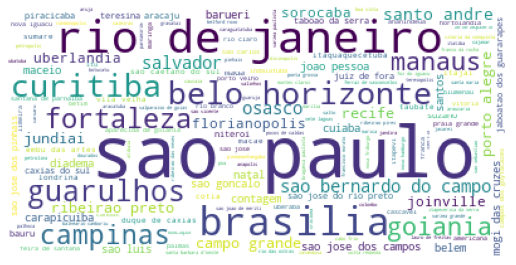

In [29]:
cities = data["city_encoded"].value_counts()
cities_wordcloud = WordCloud(background_color="white").fit_words(cities)
plt.figure(figsize=(9,9))
plt.imshow(cities_wordcloud)
plt.axis("off")

[Text(0, 0.5, '% frequency'),
 Text(0.5, 0, 'city'),
 Text(0.5, 1.0, 'Top 5 cities ')]

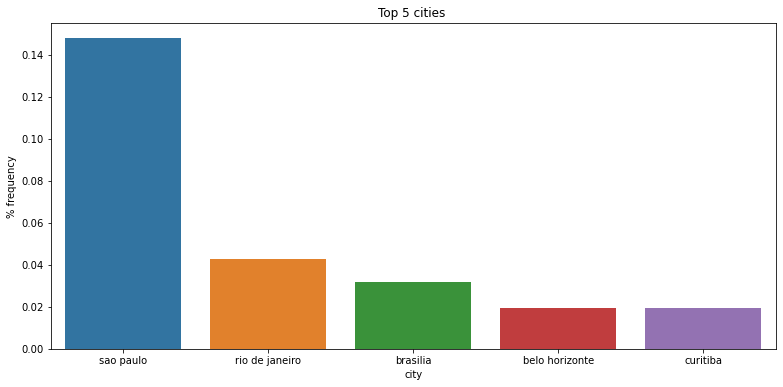

In [30]:
cities_top5 = (cities/np.sum(cities)).head()
plt.figure(figsize=(13,6))
sb.barplot(x=cities_top5.index,y=cities_top5.values).set(
    xlabel='city', 
    ylabel='% frequency',
    title="Top 5 cities "
)

# Marcas de carros mais frequentes

No seguente worldcloud pode-se apreciar as marcas de carros mais frequentes: gm-chevrolet, fiat, volkswagen. 

(-0.5, 399.5, 199.5, -0.5)

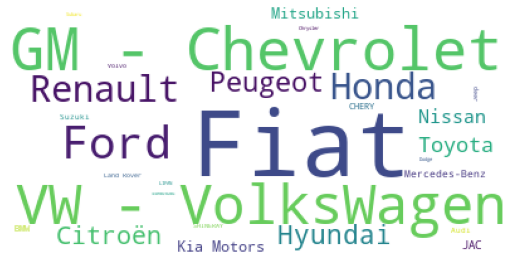

In [31]:
auto_brand = data["auto_brand"].value_counts()
auto_brand_wordcloud = WordCloud(background_color="white").fit_words(auto_brand)
plt.figure(figsize=(9,9))
plt.imshow(auto_brand_wordcloud)
plt.axis("off")

[Text(0, 0.5, '% frequency'),
 Text(0.5, 0, 'auto brand'),
 Text(0.5, 1.0, 'Top 5 auto brand ')]

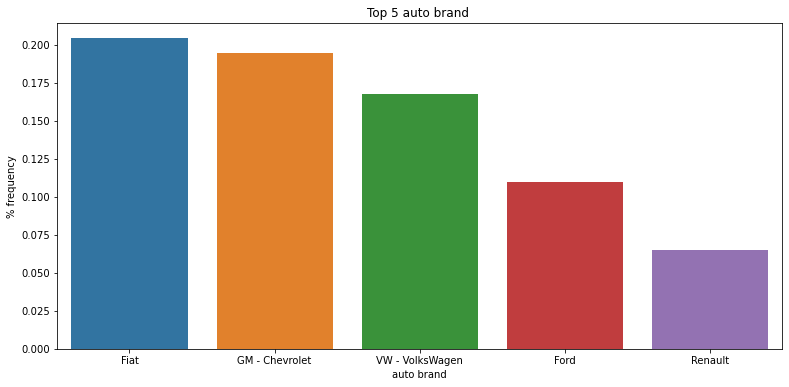

In [32]:
auto_brand_top5 = (auto_brand/np.sum(auto_brand)).head()
plt.figure(figsize=(13,6))
sb.barplot(x=auto_brand_top5.index,y=auto_brand_top5.values).set(
    xlabel='auto brand', 
    ylabel='% frequency',
    title="Top 5 auto brand "
)

# Motivos mais frequentes para obter emprestismo

No seguente worldcloud pode-se apreciar que as cidades mais frequentes são: pagar dividas, investimento. 

(-0.5, 399.5, 199.5, -0.5)

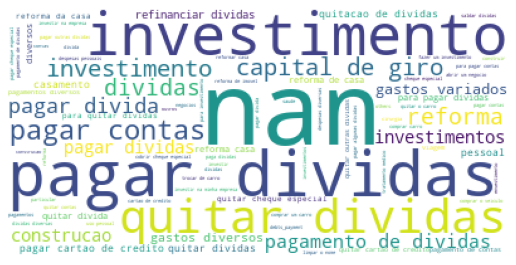

In [33]:
informed_purpose = data["informed_purpose_encoded"].value_counts()
informed_purpose_wordcloud = WordCloud(background_color="white").fit_words(informed_purpose)
plt.figure(figsize=(9,9))
plt.imshow(informed_purpose_wordcloud)
plt.axis("off")

In [34]:
characters = ["de","para", "da", "do", "outras", "outra", "na", "minha","um","pagar","o","a","cobrir","meu","trocar",
             "quitar","fazer","outro","algumas","paga","uma","sanar","as","em","e","pra","no","banco"]
def get_informed_purpose_encoded(informed_list):
    stopwords = [str(vetor_lenght) for vetor_lenght in range(0,100)]+characters
    informed_word_list = [ingredient_i.strip() for ingredient_i in informed_list.split(" ")]
    temp = filter((lambda x: x not in stopwords), informed_word_list)
        
    return " ".join(temp)


#Para substituir

{"divida":"dividas", "dividas ":"dividas", "pagamento dividas":"dividas","quitacao dividas":"dividas",
"contas":"dividas",'refinanciar dividas':"dividas", "contas":"dividas",'cartao credito':"dividas",'refinanciar dividas':"dividas", 
"investimento ":"investimento",'investir empresa':"investimento", "carro": "comprar carro", 'comprar veiculo':"comprar carro",
'abrir negocio':"investimento", 'divida ':"dividas",'dividas diversas':"dividas",'contas diversas':"dividas",'negocios':"investimento",
'debts_payment':"dividas",'investir em negocio':"investimento",'montar negocio':"investimento",'investir ':"investimento",'investir no negocio':"investimento",
'comprar moto':"comprar carro", "comprar carro ":"comprar carro", 'investir em empresa':"investimento", 'carro ':"comprar carro","investimentos":"investimento","investir":"investimento","investimetos ":"investimento","nan":"without reasons"}

In [35]:
data["informed_purpose_encoded"] = data["informed_purpose_encoded"].apply(lambda x: get_informed_purpose_encoded(x)).replace({"divida":"dividas", "dividas ":"dividas", "pagamento dividas":"dividas","quitacao dividas":"dividas",
"contas":"dividas",'refinanciar dividas':"dividas", "contas":"dividas",'cartao credito':"dividas",'refinanciar dividas':"dividas", 
"investimento ":"investimento",'investir empresa':"investimento", "carro": "comprar carro", 'comprar veiculo':"comprar carro",
'abrir negocio':"investimento", 'divida ':"dividas",'dividas diversas':"dividas",'contas diversas':"dividas",'negocios':"investimento",
'debts_payment':"dividas",'investir em negocio':"investimento",'montar negocio':"investimento",'investir ':"investimento",'investir no negocio':"investimento",
'comprar moto':"comprar carro", "comprar carro ":"comprar carro", 'investir em empresa':"investimento", 'carro ':"comprar carro","investimentos":"investimento","investir":"investimento","investimetos ":"investimento",
                                                                                                               "nan":"without reasons"})

(-0.5, 399.5, 199.5, -0.5)

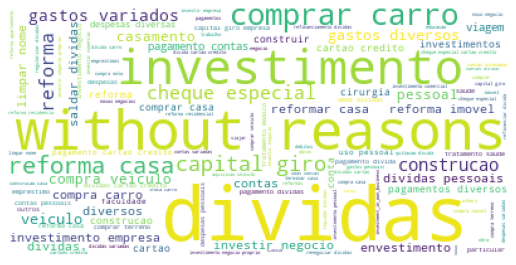

In [36]:
informed_purpose = data["informed_purpose_encoded"].value_counts()
informed_purpose_wordcloud = WordCloud(background_color="white").fit_words(informed_purpose)
plt.figure(figsize=(9,9))
plt.imshow(informed_purpose_wordcloud)
plt.axis("off")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Reasons'),
 Text(0.5, 1.0, 'Top 5 reasons purpose ')]

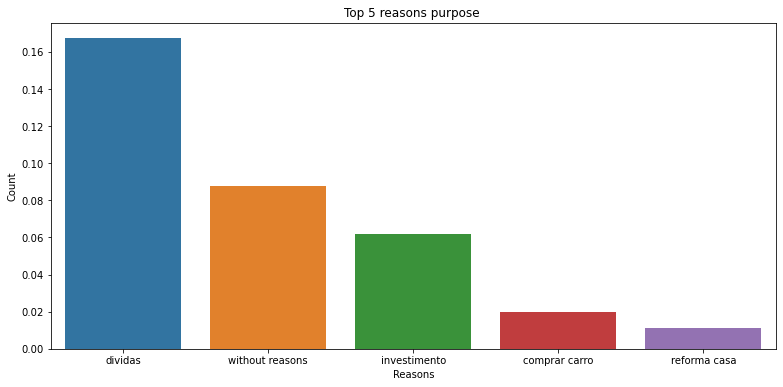

In [37]:
informed_purpose_top5 = (informed_purpose/np.sum(informed_purpose)).head()
plt.figure(figsize=(13,6))
sb.barplot(x=informed_purpose_top5.index,y=informed_purpose_top5.values).set(
    xlabel='Reasons', 
    ylabel='Count',
    title="Top 5 reasons purpose "
)

**Concluções para as categorias com mais de 50 níveis**
Utilizando a lei de Pareto temos que:
* As cidades mais frequentes são São Paolo, Rio de Janeiro, Belo Horizonte e Brasilia e curitiba. As cidades escolhidas para o nosso futuro análise serão São Paolo e Rio de Janeiro ja que representão o 80% da variação total.
* Para a variável auto_brand, o modelo Fiat representa o 80% da variação total.
* Para a variável informed_purpose os níveis dividas e without reasons representam o 80% da variabilidade total.

# Variáveis com menos de 50 níveis

In [38]:
features_categorical_lower_levels = data[features_categorical].nunique()<50
features_categorical_lower_levels = data[features_categorical].loc[:,features_categorical_lower_levels].columns.to_numpy()
data[features_categorical_lower_levels].head()

banking_debts     channel  commercial_debts  dishonored_checks  \
0              0      search                 0                  0   
1              0      direct                 0                  0   
2              0  affiliates                 0                  0   
3              0      social                 0                  0   
4              0      search                 0                  0   

                                     education_level  expired_debts  \
0  Ensino médio completo (antigo 2º grau, secundá...              0   
1  Ensino médio completo (antigo 2º grau, secundá...              0   
2                         Educação superior completa              0   
3                                                NaN              0   
4  Ensino médio completo (antigo 2º grau, secundá...              0   

   form_completed  gender  informed_restriction landing_page_product  \
0             0.0  female                   0.0         PersonalLoan   
1             0.0    male                   0.0                  NaN   
2             0.0    male                   0.0                  NaN   
3             0.0    male                   0.0         PersonalLoan   
4             0.0    male                   0.0         PersonalLoan   

  marital_status  protests  sent_to_analysis state utm_term  \
0            NaN         0               0.0    SP      NaN   
1            NaN         0               0.0    SP      NaN   
2            NaN         0               0.0    AM      NaN   
3            NaN         0               0.0    BA      NaN   
4            NaN         0               0.0    SP      NaN   

   verified_restriction  
0                   0.0  
1                   0.0  
2                   0.0  
3                   1.0  
4                   0.0

In [39]:
data[features_categorical_lower_levels].nunique()

banking_debts            2
channel                  9
commercial_debts         2
dishonored_checks        2
education_level          9
expired_debts            2
form_completed           2
gender                   2
informed_restriction     2
landing_page_product     7
marital_status           6
protests                 2
sent_to_analysis         2
state                   27
utm_term                 3
verified_restriction     2
dtype: int64

In [40]:
data[features_categorical_lower_levels].isna().mean()

banking_debts           0.000000
channel                 0.037669
commercial_debts        0.000000
dishonored_checks       0.000000
education_level         0.192479
expired_debts           0.000000
form_completed          0.000000
gender                  0.126142
informed_restriction    0.053737
landing_page_product    0.380359
marital_status          0.973198
protests                0.000000
sent_to_analysis        0.000000
state                   0.000000
utm_term                0.681712
verified_restriction    0.004267
dtype: float64

# channel: Canal do entrada do lead
Parece que as pessoas que entraram pelo o canal *direto* tem mais chance de ser enviados ao análise. Acontece tudo o contrario para as pessoas que entraram pelo o canal *emailaffiliates*.

In [41]:
pd.crosstab(data["channel"],data["sent_to_analysis"]).apply(lambda r: r/r.sum(), axis=1)

sent_to_analysis       0.0       1.0
channel                             
affiliates        0.750308  0.249692
direct            0.703209  0.296791
display           0.877915  0.122085
emailaffiliates   0.907478  0.092522
referral          0.724265  0.275735
remarketing       0.825802  0.174198
search            0.758842  0.241158
seo               0.731092  0.268908
social            0.744681  0.255319

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


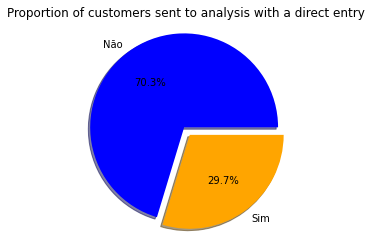

In [42]:
labels = ['Não','Sim']
sizes = [data.loc[data["channel"]=="direct",
                   :]["sent_to_analysis"].value_counts()]
colors = ['blue','orange']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True,explode=[0,0.1], colors=colors)
ax1.axis('equal')
ax1.set_title('Proportion of customers sent to analysis with a direct entry')
plt.show()

# education_level: O nivel educacional

A variável nivel educacional está perdida um 19%, mas olhando a tabela 2x2 vs a variável alvo, parece não influenciar. As pessoas que tem estudos universitarios completos parece que tem mais chances de passar para a entrevista, acontece o mesmo para as pessoas que tem estudo universitarios incompleto que ao azar, mas para as pessoas que não tem esse grau, as chances são muito menores.

In [43]:
pd.crosstab(data["education_level"],data["sent_to_analysis"]).apply(lambda r: r/r.sum(), axis=1)

sent_to_analysis                                         0.0       1.0
education_level                                                       
4ª série completa do ensino fundamental (antigo...  0.848485  0.151515
Analfabeto, inclusive o que, embora tenha receb...  1.000000  0.000000
Até a 4ª série incompleta do ensino fundamental...  0.894231  0.105769
Da 5ª à 8ª série do ensino fundamental (antigo ...  0.863081  0.136919
Educação superior completa                          0.682979  0.317021
Educação superior incompleta.                       0.735849  0.264151
Ensino fundamental completo (antigo 1º grau ou ...  0.860617  0.139383
Ensino médio completo (antigo 2º grau, secundár...  0.803049  0.196951
Ensino médio incompleto (antigo 2º grau, secund...  0.849718  0.150282

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


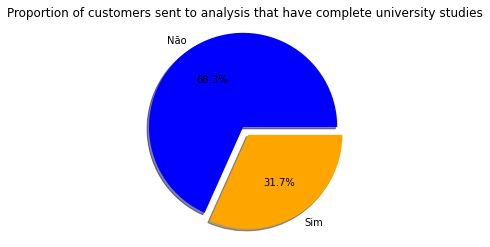

In [44]:
labels = ['Não','Sim']
sizes = [data.loc[data["education_level"]=="Educação superior completa",
                   :]["sent_to_analysis"].value_counts()]
colors = ['blue','orange']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True,explode=[0,0.1], colors=colors)
ax1.axis('equal')
ax1.set_title('Proportion of customers sent to analysis that have complete university studies')
plt.show()

# landing_page_product: Produto da página inicial do cliente

As pessoas que tem um produto da página inicial *AutoFin* e *AutoRefinancing* tem maiores chances de serem enviados para a entrevista que em comparação para os outros produtos e ao azar. 

In [45]:
pd.crosstab(data["landing_page_product"],data["sent_to_analysis"]).apply(lambda r: r/r.sum(), axis=1)

sent_to_analysis           0.0       1.0
landing_page_product                    
AutoFin               0.644444  0.355556
AutoRefinancing       0.666237  0.333763
Cards                 0.949153  0.050847
HomeFin               1.000000  0.000000
HomePage              0.778776  0.221224
HomeRefinancing       0.803797  0.196203
PersonalLoan          0.859105  0.140895

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


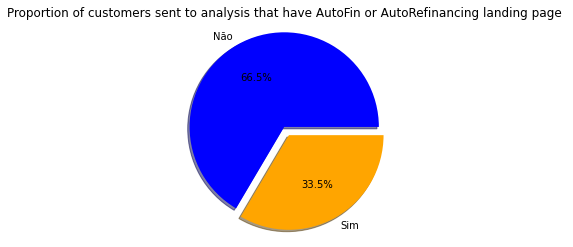

In [46]:
labels = ['Não','Sim']
sizes = [data.loc[(data["landing_page_product"]=="AutoFin")|(data["landing_page_product"]=="AutoRefinancing"),
                   :]["sent_to_analysis"].value_counts()]
colors = ['blue','orange']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True,explode=[0,0.1], colors=colors)
ax1.axis('equal')
ax1.set_title('Proportion of customers sent to analysis that have AutoFin or AutoRefinancing landing page ')
plt.show()

# marital_status: estado civil da pessoa

Muito interessante, as pessoas que colocaram seu estado civil tem muitas mais chances de serem enviadas para o análise. Vale a pena dizer que a variável está perdida um 97%.

In [47]:
pd.crosstab(data["marital_status"].isna(),data["sent_to_analysis"]).apply(lambda r: r/r.sum(), axis=1)

sent_to_analysis       0.0       1.0
marital_status                      
False             0.082090  0.917910
True              0.801329  0.198671

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


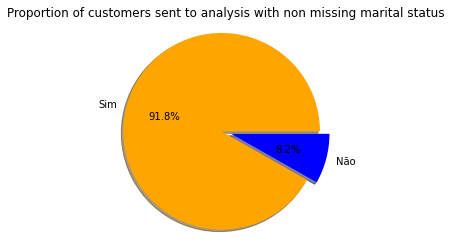

In [48]:
labels = ["Sim","Não"]
sizes = [data.loc[data["marital_status"].notna(),:]["sent_to_analysis"].value_counts()]
colors = ['orange','blue']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True,explode=[0,0.1], colors=colors)
ax1.axis('equal')
ax1.set_title('Proportion of customers sent to analysis with non missing marital status')
plt.show()

# state: estado da pessoa

Ao parecer as pessoas dos estados ES e AP tem mais chances, mas isso pode acontecer por causa dos pouca informação historica nesses estados. Nesta variável utilizaremos também a lei de Pareto, assim as pessoas que são do estado de SP representão o 80% da variação total. 


In [49]:
data["state"].value_counts()

SP    6339
RJ    1337
MG    1289
PR     804
SC     591
RS     541
DF     496
BA     476
GO     448
CE     372
PE     326
MT     232
PA     206
MS     202
AM     179
ES     173
MA     164
RN     154
PB     143
AL     104
RO      91
PI      88
TO      76
SE      71
AP      40
AC      35
RR      22
Name: state, dtype: int64

In [50]:
pd.crosstab(data["state"],data["sent_to_analysis"]).apply(lambda r: r/r.sum(), axis=1)

sent_to_analysis       0.0       1.0
state                               
AC                0.914286  0.085714
AL                0.894231  0.105769
AM                0.821229  0.178771
AP                0.725000  0.275000
BA                0.819328  0.180672
CE                0.811828  0.188172
DF                0.780242  0.219758
ES                0.722543  0.277457
GO                0.787946  0.212054
MA                0.878049  0.121951
MG                0.775795  0.224205
MS                0.826733  0.173267
MT                0.806034  0.193966
PA                0.805825  0.194175
PB                0.832168  0.167832
PE                0.797546  0.202454
PI                0.840909  0.159091
PR                0.763682  0.236318
RJ                0.776365  0.223635
RN                0.811688  0.188312
RO                0.956044  0.043956
RR                0.954545  0.045455
RS                0.767098  0.232902
SC                0.846024  0.153976
SE                0.845070  0.154930
SP                0.762896  0.237104
TO                0.776316  0.223684

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'state'), Text(0.5, 1.0, 'Top 5 states')]

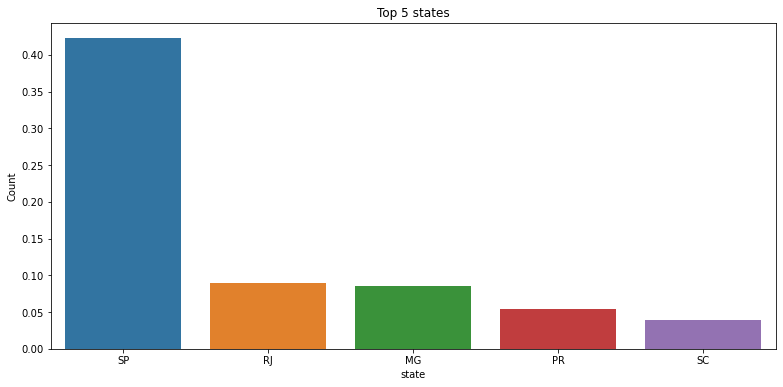

In [51]:
state = data["state"].value_counts()
state_top5 = (state/np.sum(state)).head()
plt.figure(figsize=(13,6))
sb.barplot(x=state_top5.index,y=state_top5.values).set(
    xlabel='state', 
    ylabel='Count',
    title="Top 5 states"
)

# utm_term: tipo de dispositivo do cliente

In [52]:
data["utm_term"].value_counts()

c    3257
m    1426
t      91
Name: utm_term, dtype: int64

In [53]:
pd.crosstab(data["utm_term"],data["sent_to_analysis"]).apply(lambda r: r/r.sum(), axis=1)

sent_to_analysis       0.0       1.0
utm_term                            
c                 0.788763  0.211237
m                 0.839411  0.160589
t                 0.791209  0.208791

In [54]:
pd.crosstab(data["utm_term"].isna(),data["sent_to_analysis"]).apply(lambda r: r/r.sum(), axis=1)

sent_to_analysis       0.0       1.0
utm_term                            
False             0.803938  0.196062
True              0.771834  0.228166

# Variáveis categóricas com 2 níveis

In [55]:
features_categorical_2_levels = data[features_categorical_lower_levels].nunique()==2
features_categorical_2_levels = data[features_categorical_lower_levels].loc[:,features_categorical_2_levels].columns.to_numpy()

## Proporção de sucessos para as variáveis dummies

Podemos observar que para as variáveis *dishonored_checks*, *expired_debts* e *protests* apresentão pouca variabilidade, do qual nosso modelo pode ser afetado por a pouca informação dessas variáveis.

In [56]:
data[features_categorical_2_levels].mean()*100

banking_debts            6.120408
commercial_debts         8.860591
dishonored_checks        1.900127
expired_debts            0.266684
form_completed          27.781852
informed_restriction    17.959558
protests                 1.513434
sent_to_analysis        21.794786
verified_restriction    14.154670
dtype: float64

In [57]:
for features_categorical_2_levels_i in features_categorical_2_levels:
    mean_by_categorical_feature = pd.crosstab(data[features_categorical_2_levels_i],
                                              data["sent_to_analysis"]).apply(lambda r: r/r.sum(), axis=1)
    print(mean_by_categorical_feature)

sent_to_analysis       0.0       1.0
banking_debts                       
0                 0.768482  0.231518
1                 0.990196  0.009804
sent_to_analysis       0.0       1.0
commercial_debts                    
0                 0.764448  0.235552
1                 0.963130  0.036870
sent_to_analysis        0.0       1.0
dishonored_checks                    
0                  0.777967  0.222033
1                  0.992982  0.007018
sent_to_analysis       0.0       1.0
expired_debts                       
0                 0.781469  0.218531
1                 1.000000  0.000000
sent_to_analysis       0.0       1.0
form_completed                      
0.0               0.836780  0.163220
1.0               0.639789  0.360211
sent_to_analysis       0.0       1.0
gender                              
female            0.806994  0.193006
male              0.779157  0.220843
sent_to_analysis           0.0       1.0
informed_restriction                    
0.0                   0.75

# *Concluções Gerais:*

1. Um 21.8% de pessoas foram enviadas para o análise dado que ele foi pré-aprovado.
2. Para as variaveis monthly_income, collateral_value, loan_amount, collateral_debt e monthly_payment podemos utilizar a transformação do tipo logaritmo para obter valores simétricos e que os valores atípicos sejam menos possivelmente influentes.
3. As cidades escolhidas para o nosso futuro análise serão São Paolo e Rio de Janeiro ja que representão o 80% da variação total.
4. Para a variável auto_brand, o modelo Fiat representa o 80% da variação total.
5. Para a variável informed_purpose os níveis dividas e without reasons representam o 80% da variabilidade total.
6. Para a variável state será escolhido o estado de SP.
7. Para a variável landing_page_product agrupar se a pessoa fez mediante *AutoFin* ou *AutoRefinancing*.
8. Criar uma nova variável em que se uma pessoa colocou seu estado civil (marital_status).
9. Criar uma variável para especificar se tem-se informação sobre collateral_debt.
10. Não é sugerido utilizar as variáveis *dishonored_checks*, *expired_debts* e *protests* já que apresentão pouca variabilidade.
